In [120]:
!pip install scikit-plot

In [121]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [122]:
data=pd.read_csv(r'C:\Users\monish\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [123]:
## Finding the missing Value
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## There is no missing Value

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [125]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## WE will check the correlation with each other

In [126]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


## Lets visualize the correlation using HeatPlot

<AxesSubplot:>

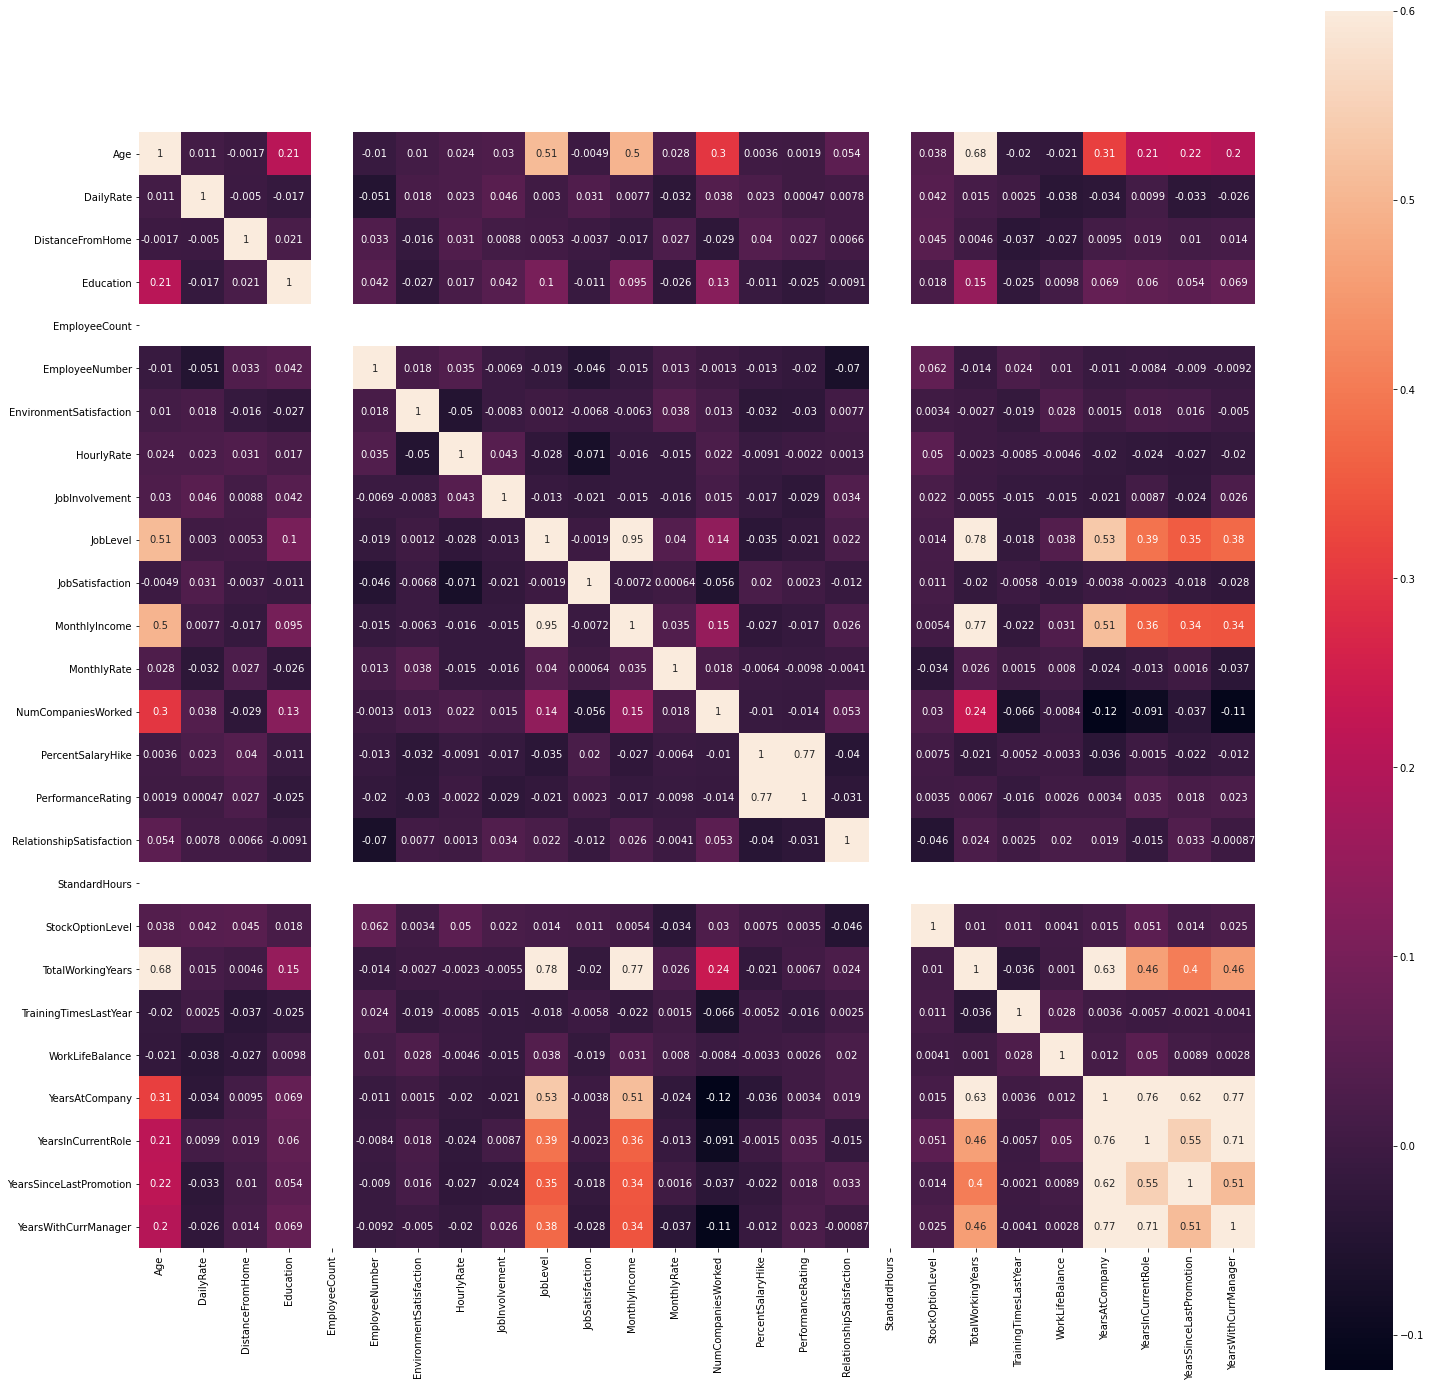

In [127]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

In [128]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

DailyRate
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5     

## WE will look out the plot which are of ObjectType

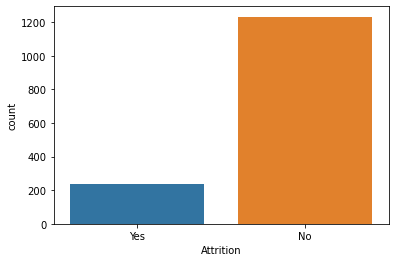

In [129]:
sns.countplot(data['Attrition'])
plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

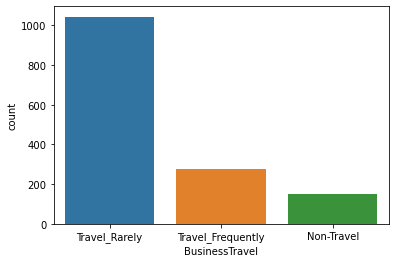

In [130]:
sns.countplot(data['BusinessTravel'])

<AxesSubplot:xlabel='Department', ylabel='count'>

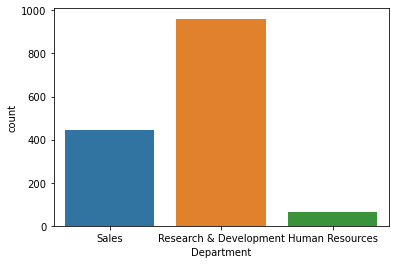

In [131]:
sns.countplot(data['Department'])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

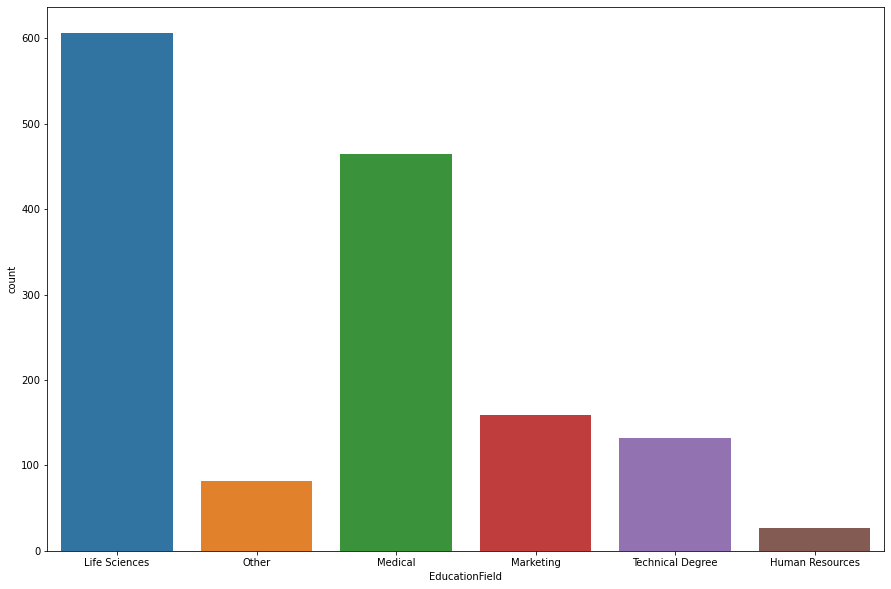

In [132]:
plt.figure(figsize=(15,10))
sns.countplot(data['EducationField'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

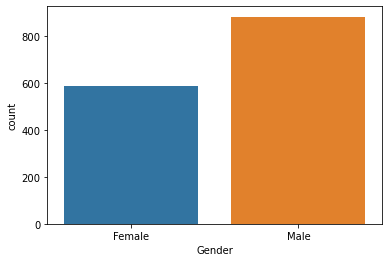

In [133]:
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

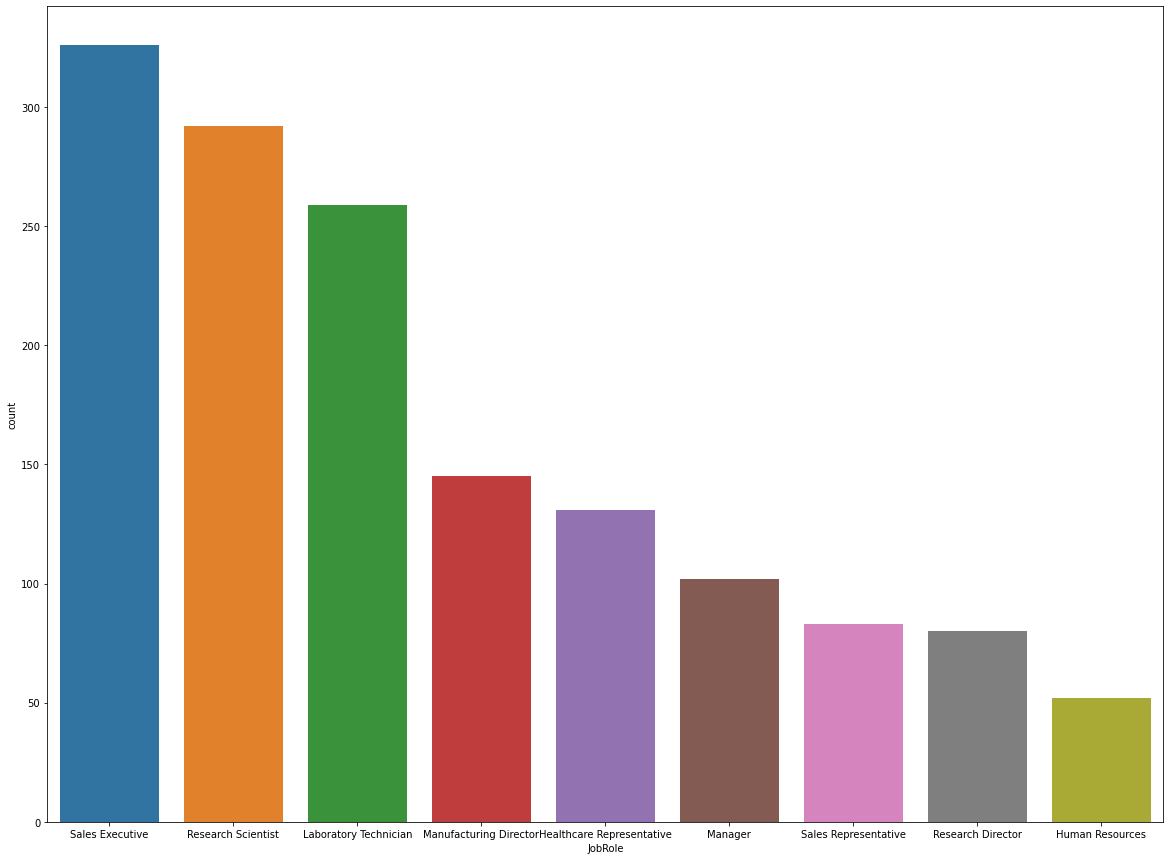

In [134]:
plt.figure(figsize=(20,15))
sns.countplot(data['JobRole'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

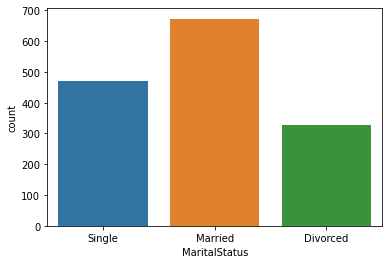

In [135]:
sns.countplot(data['MaritalStatus'])

<AxesSubplot:xlabel='Over18', ylabel='count'>

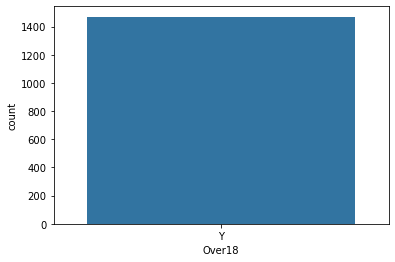

In [136]:
sns.countplot(data['Over18'])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

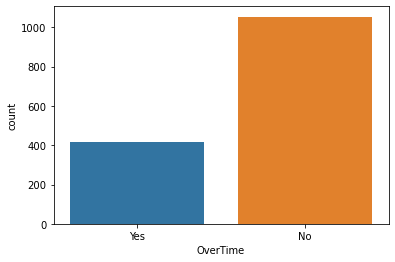

In [137]:
sns.countplot(data['OverTime'])

## we will Drop the column such as 'standardHour','EmployeeCount' because it contain 'NAN' value and also delete 'over18' because all are above 18

In [138]:
data=data.drop(columns=['Over18','EmployeeCount','StandardHours'])

In [139]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [140]:
data['OverTime'] = data['OverTime'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [141]:
data['MaritalStatus'] = data['MaritalStatus'].map( {'Single':1,'Married': 2, 'Divorced': 0} ).astype(int)

In [142]:
data['Department'] = data['Department'].map( {'Research & Development': 0, 'Sales': 1,'Human Resources':2} ).astype(int)

In [143]:
data['EducationField'] = data['EducationField'].map( {'Medical': 0, 'Life Sciences': 1,'Marketing':2,'Technical Degree':3,'Human Resources':4,'Other':5} ).astype(int)

In [144]:
data['JobRole'] = data['JobRole'].map( {'Sales Executive': 1, 'Research Scientist': 2,'Laboratory Technician':3,'Manufacturing Director':4,'Healthcare Representative':5,'Manager':6,'Sales Representative':7,'Research Director':8,'Human Resources':0} ).astype(int)

In [145]:
data['BusinessTravel'] = data['BusinessTravel'].map( {'Travel_Rarely': 1, 'Travel_Frequently': 2,'Non-Travel':3} ).astype(int)

In [146]:
data['Attrition'] = data['Attrition'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [147]:
data['Gender'] = data['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [149]:
data['Age'].value_counts(ascending=True)

57     4
60     5
18     8
19     9
59    10
20    11
21    13
23    14
58    14
56    14
22    16
54    18
52    18
53    19
51    19
48    19
55    22
49    24
47    24
25    26
24    26
50    30
43    32
44    33
46    33
26    39
41    40
45    41
39    42
42    46
28    48
27    48
37    50
40    57
38    58
33    58
30    60
32    61
29    68
36    69
31    69
34    77
35    78
Name: Age, dtype: int64

In [150]:
data.loc[(data['Age'] > 4) &  (data['Age'] <= 18), 'Age'] = 0
data.loc[(data['Age'] > 18) & (data['Age'] <= 39), 'Age'] = 1
data.loc[(data['Age'] > 39) & (data['Age'] <= 60), 'Age']   = 2                                                    
data.loc[ data['Age'] > 60, 'Age'] = 3
data['Age'] = data['Age'].astype(int)

#data = data.drop(['TotalVolumeBand'], axis=1)
    
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,1,1102,1,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,2,0,2,279,0,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,1,1,1,1373,0,2,2,5,4,4,...,3,2,0,7,3,3,0,0,0,0
3,1,0,2,1392,0,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,1,0,1,591,0,2,1,0,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,2,884,0,23,2,0,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,1,0,1,613,0,6,1,0,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,1,0,1,155,0,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,2,0,2,1023,1,2,3,0,2065,4,...,3,4,0,17,3,2,9,6,0,8


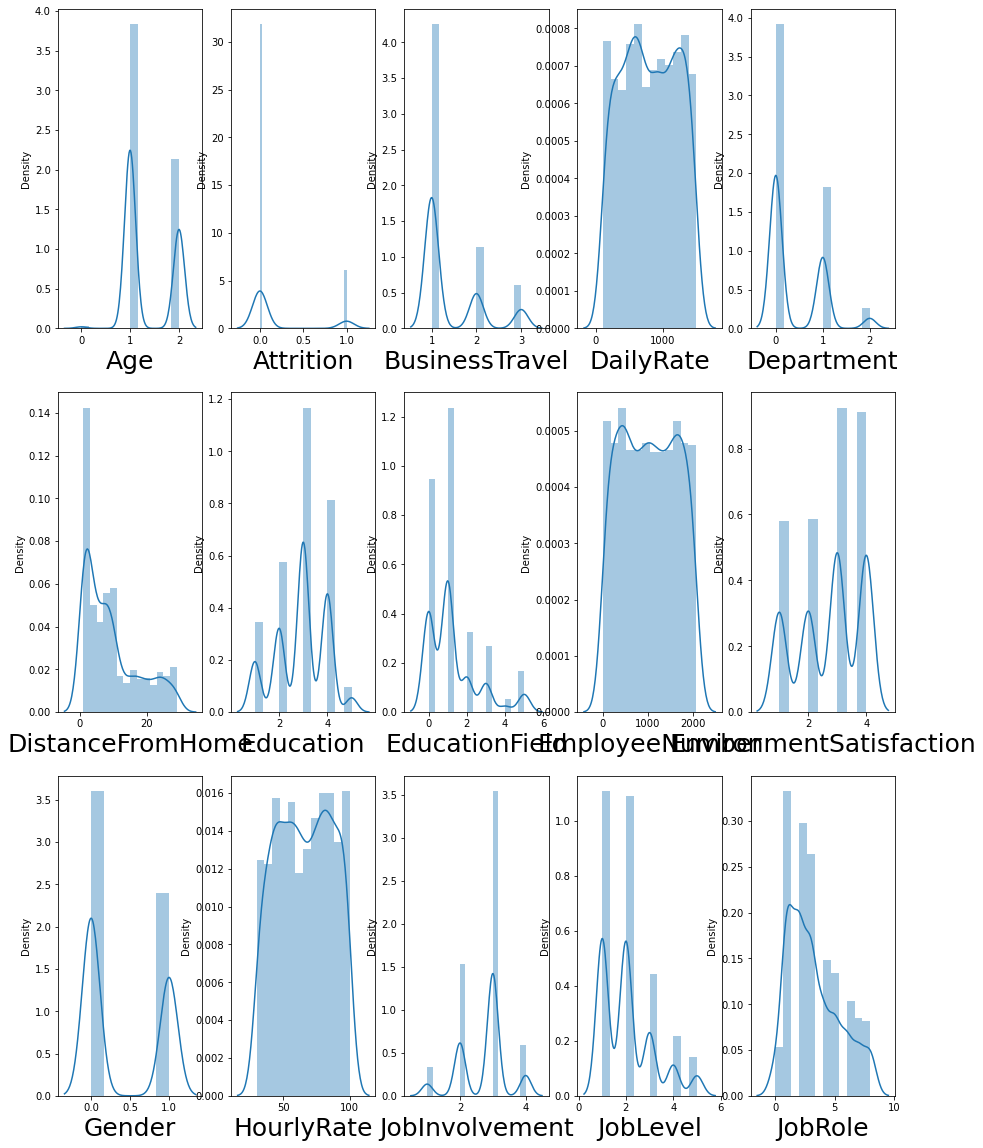

In [152]:
### Now we will visualize the data

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=15:
        
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

## Removing skewness using Z-Score

In [153]:
from scipy.stats import zscore
import numpy as np

In [154]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1470, 32)
(1387, 32)


In [ ]:
data.skew()

## Splitting the dataset into features as 'X' and the label or Vector as 'Y'

In [90]:
X = data.drop("Attrition", axis=1)
Y = data["Attrition"]

## Building a Model

In [91]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

83.88

In [92]:
# Support Vector Machines

svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

83.88

In [93]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
Y_pred = knn.predict(X)
acc_knn = round(knn.score(X, Y) * 100, 2)
acc_knn

87.89

In [94]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X, Y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian

78.98

In [95]:
linear_svc = LinearSVC()
linear_svc.fit(X, Y)
Y_pred = linear_svc.predict(X)
acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
acc_linear_svc

83.88

In [96]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X, Y)
Y_pred = sgd.predict(X)
acc_sgd = round(sgd.score(X, Y) * 100, 2)
acc_sgd

83.88

In [97]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X, Y)
Y_pred = dt.predict(X)
acc_decision_tree = round(dt.score(X, Y) * 100, 2)
acc_decision_tree

100.0

In [98]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
Y_pred = random_forest.predict(X)
random_forest.score(X, Y)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
acc_random_forest

100.0

In [99]:
from sklearn.model_selection import cross_val_score
cross_lr=cross_val_score(logreg,X,Y,cv=5)
cross_lr=cross_val_score(logreg,X,Y,cv=5).mean()
cross_lr

0.8380952380952381

## Cross-Validation of the Model

In [100]:
cross_svc=cross_val_score(svc,X,Y,cv=5)

cross_svc=cross_val_score(svc,X,Y,cv=5).mean()
cross_svc

0.8387755102040817

In [101]:
cross_knn=cross_val_score(knn,X,Y,cv=5)

cross_knn=cross_val_score(knn,X,Y,cv=5).mean()
cross_knn

0.7986394557823129

In [102]:
cross_gaussian=cross_val_score(gaussian,X,Y,cv=5)

cross_gaussian=cross_val_score(gaussian,X,Y,cv=5).mean()
cross_gaussian

0.7925170068027211

In [103]:
cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5)

cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5).mean()
cross_linear_svc

0.6183673469387755

In [104]:
cross_sgd=cross_val_score(sgd,X,Y,cv=5)

cross_sgd=cross_val_score(sgd,X,Y,cv=5).mean()
cross_sgd

0.7054421768707483

In [105]:
cross_dt=cross_val_score(dt,X,Y,cv=5)
cross_dt=cross_val_score(dt,X,Y,cv=5).mean()

cross_dt

0.791156462585034

In [106]:
cross_random_forest=cross_val_score(random_forest,X,Y,cv=5)
cross_random_forest=cross_val_score(random_forest,X,Y,cv=5).mean()

cross_random_forest 

0.8591836734693878

## Building DataFrames

In [107]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
     'cross_val_score':[cross_lr,cross_svc,cross_knn,
                       cross_gaussian,cross_linear_svc,
                       cross_sgd,cross_dt,cross_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score,cross_val_score
3,Random Forest,100.00,0.792517
7,Decision Tree,100.00,0.859184
1,KNN,87.89,0.838776
0,Support Vector Machines,83.88,0.838095
2,Logistic Regression,83.88,0.798639
5,Stochastic Gradient Decent,83.88,0.705442
6,Linear SVC,83.88,0.791156
4,Naive Bayes,78.98,0.618367


## HyperParameter Tunning

In [113]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
search= GridSearchCV(logreg, param_grid, cv = 5)

In [114]:
search.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [116]:
best_model = search.best_params_
best_model

{'C': 0.4393970560760795}

In [117]:
logreg = LogisticRegression(C= 0.4393970560760795)
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

83.88

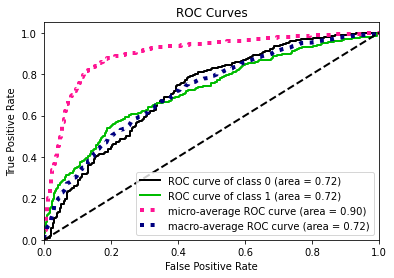

In [118]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=logreg.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

## Saving the model

In [119]:
import joblib
joblib.dump(logreg,"HRAnalyticsModel.pkl")

['HRAnalyticsModel.pkl']